1. (1 point). Write down a code able to identify whether a pair of segments share points.
Three possible answers should be available: 
- segments do not intersect.
- segments do intersect giving the intersection point.
- segments do intersect giving an intersection interval.

In [1]:
#external dependencies 
import numpy as np
from typing import  List
from itertools import combinations

#custom dependencies
from segment import Segment
from vector import Vector
from plotter import VectorPlotter as vp
from plotter import SegmentPlotter as sp

S1 = Segment(Vector(np.array([[1],[2]])), Vector(np.array([[3],[4]])))
S2 = Segment(Vector(np.array([[3],[4]])), Vector(np.array([[5],[6]])))
S3 = Segment(Vector(np.array([[2],[3]])), Vector(np.array([[5],[6]])))
S4 = Segment(Vector(np.array([[4],[5]])), Vector(np.array([[5],[6]])))

Use your code to evaluate intersections of S1 with S2 , S3 and S4 .

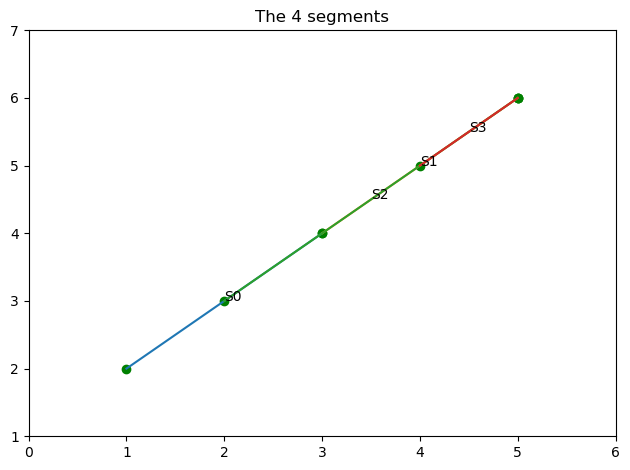

In [2]:
sp.plot_many([S1, S2, S3, S4], with_labels = True, title = "The 4 segments")

To evaluate the intersections of these segments and check the correctness of the code developed until now lets build a brutforcing approach that uses the methods I've built until now.

POINT intersect Vec(3, 4)
INTERVAL intersect Segment(Vec(2, 3), Vec(3, 4))
INTERVAL intersect Segment(Vec(4, 5), Vec(5, 6))
INTERVAL intersect Segment(Vec(3, 4), Vec(5, 6))


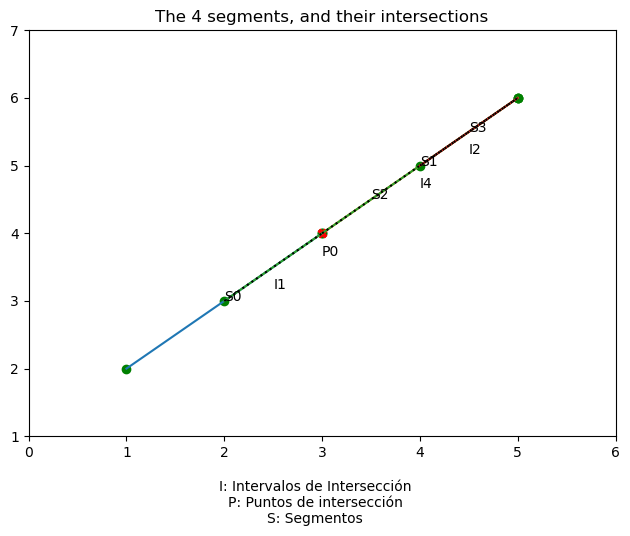

In [3]:
def find_intersections_by_brute_force(segments: List[Segment]) -> List[Vector]:

    """Find the intersections of a list of segments by brute force."""

    pairs = list(combinations(segments, 2))
    intersections = []

    for combination in pairs:

        s1 = combination[0]
        s2 = combination[1]

        if s1.segments_intersect(s2):

            # Find the intersection point (if any)
            intersection = s1.find_intersection(s2)

            # Find the intersection on endpoints (if any)
            intersection_on_endpoints = s1.find_intersection_on_endpoints(s2)

            # Find the intersection on segments (if any)
            intersection_on_segments = s1.find_interval_intersection(s2)
            
            if intersection_on_segments is not None:
                intersections.append(intersection_on_segments)
            elif intersection_on_endpoints is not None:
                intersections.append(intersection_on_endpoints)
            else:
                intersections.append(intersection)

    return intersections

I = find_intersections_by_brute_force([S1, S2, S3, S4])
sp.plot_many_with_intersections(segments = [S1, S2, S3, S4],
                                intersections = I,
                                with_labels = True,
                                title = "The 4 segments, and their intersections")

2. (2 points). Generate a set of points using the following code

In [4]:
np.random.seed(69)
X = np.random.rand(20, 2)

3. (2 points). Implement the sweep line algorithm and apply it to the set of segments
given in the attached file (segmentos.csv). Identify intersection points and intersecting
segments. Plot the process and the result.